**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
%%pycodestyle


class MyKNeighborsClassifier\
  (NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):  
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_tr = X.copy()
        self.y_tr = y.copy()
    
    def predict(self, X):
        predictions = []
        cathegories = self.y_tr.max()+1
        for i, x in enumerate(X):
            D = self.X_tr - x
            dists = (D**2).sum(axis=1)
            best_indices = np.argsort(dists)[0:self.n_neighbors:]
            avg = self.y_tr[best_indices]
            freq = np.zeros(cathegories)
            for k in avg:
                freq[k] += 1
            predictions.append(np.argmax(freq))
        return predictions
    
    def predict_proba(self, X):
        cathegories = self.y_tr.max()+1
        predictions = np.zeros((X.shape[0], cathegories))
        for i, x in enumerate(X):
            D = self.X_tr - x
            dists = (D**2).sum(axis=1)
            best_indices = np.argsort(dists)[0:self.n_neighbors:]
            avg = self.y_tr[best_indices]
            freq = np.zeros(cathegories)
            for k in avg:
                freq[k] += 1
            freq = freq / freq.sum()
            predictions[i] = freq
        return predictions
    
    def score(self, X, y):
        answers = self.predict(X)
        correct = 0
        for i in range(X.shape[0]):
            if answers[i] == y[i]:
                correct += 1
        return correct/float(X.shape[0])

**IRIS**

In [15]:
iris = datasets.load_iris()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 1.93 ms, sys: 122 µs, total: 2.05 ms
Wall time: 1.65 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 67 µs, sys: 4 µs, total: 71 µs
Wall time: 79.4 µs


In [20]:
%time clf.predict(X_test)

CPU times: user 2.58 ms, sys: 0 ns, total: 2.58 ms
Wall time: 2.04 ms


array([1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2])

In [21]:
%time my_clf.predict(X_test)

CPU times: user 3.5 ms, sys: 229 µs, total: 3.73 ms
Wall time: 2.74 ms


[1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2]

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 1.77 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 4.36 ms, sys: 23 µs, total: 4.39 ms
Wall time: 3.54 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
clf.score(X_test, y_test)

0.9333333333333333

In [25]:
my_clf.score(X_test, y_test)

0.9333333333333333

The maximum is reached at the n =  8


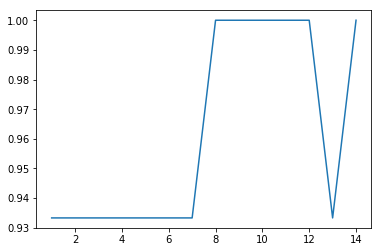

In [26]:
# Задание 3
m = 14
V = np.arange(1, m+1, 1)
W = np.zeros(m)
for i in V:
    my_clf = MyKNeighborsClassifier(n_neighbors=i) 
    my_clf.fit(X_train, y_train)
    my_clf.predict(X_test)
    W[i-1] = my_clf.score(X_test, y_test)
plt.plot(V, W)
print("The maximum is reached at the n = ", np.argmax(W)+1)
    

Опытным путём установлено, что при числе соседей от 8 до 10 получаем максимальный score. 
Если не повезло, сведения из графика могут немного отличаться от написанного

**MNIST**

In [ ]:
mnist = fetch_mldata('MNIST original')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
# matplotlib
# train_test_split
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin

seaborn нужен для визуализации статитстической информации
matplotlib - это библиотека для рисования различного рода 
    графиков и диаграмм: графики функций, кривых, поверхностей,
    гистограмм, круговых диаграмм и т.д.
train_test_split - разделение датасета на обучающую и тестовую выборки
Pipeline - это "конвейер". С его помощью можно одной командой выполнить сразу
    несколько функций. 
StandardScaler нормализует выборку так, чтобы было mean = 0, std = 1
ClassifierMixin предоставляет функцию score, вычисляющую среднее значение ошибки
    алгоритма обучения
NeighborsBase обеспечивает работу с различными видами метрик
KNeighborsMixIn реализует поиск ближайших k вершин (
SupervisedIntegerMixin даёт fit для модельки кластеризации с учителем
